In [1]:
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split, GridSearchCV
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from IPython.display import Image
## conda install pydotplus
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#from nltk.stem import WordNetLemmatizer
#LEMMER = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer

import string
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/CleanedData.csv', index_col = 0)

In [4]:
df.head(10)

,id,title,original_language,overview,genres,popularity,release_date,vote_average,vote_count,year,belongs_to_collection,budget,production_companies,production_countries,revenue,runtime,score
0,76600,Avatar: The Way of Water,en,Set more than a decade after the events of the...,"['Science Fiction', 'Adventure', 'Action']",359.169,2022-12-14,7.657,9774.0,2022,Avatar Collection,3.374943e+07,"['Twentieth Century Fox Film Corporation', 'Li...",['United States of America'],1.085076e+08,108.0,7.62
1,9552,The Exorcist,en,12-year-old Regan MacNeil begins to adapt an e...,['Horror'],106.478,1973-12-26,7.700,7217.0,1973,The Exorcist Collection,8.000000e+06,"['Warner Bros.', 'Hoya Productions']",['United States of America'],4.413061e+08,122.0,7.65
2,155,The Dark Knight,en,Batman raises the stakes in his war on crime. ...,"['Drama', 'Action', 'Crime', 'Thriller']",91.974,2008-07-16,8.512,30572.0,2008,The Dark Knight Collection,1.850000e+08,"['DC Comics', 'Legendary Pictures', 'Warner Br...","['United Kingdom', 'United States of America']",1.004558e+09,152.0,8.49
3,157336,Interstellar,en,The adventures of a group of explorers who mak...,"['Adventure', 'Drama', 'Science Fiction']",145.651,2014-11-05,8.417,32503.0,2014,NaN,1.650000e+08,"['Paramount Pictures', 'Legendary Pictures', '...","['Canada', 'United States of America', 'United...",6.751200e+08,169.0,8.40
4,11,Star Wars,en,Princess Leia is captured and held hostage by ...,"['Adventure', 'Action', 'Science Fiction']",75.106,1977-05-25,8.204,19127.0,1977,Star Wars Collection,1.100000e+07,"['Lucasfilm', 'Twentieth Century Fox Film Corp...",['United States of America'],7.753980e+08,121.0,8.17
5,1726,Iron Man,en,"After being held captive in an Afghan cave, bi...","['Action', 'Science Fiction', 'Adventure']",68.278,2008-04-30,7.639,24852.0,2008,Iron Man Collection,1.400000e+08,"['Paramount Pictures', 'Marvel Studios']",['United States of America'],5.851742e+08,126.0,7.62
6,671,Harry Potter and the Philosopher's Stone,en,Harry Potter has lived under the stairs at his...,"['Adventure', 'Fantasy']",150.089,2001-11-16,7.916,25346.0,2001,Harry Potter Collection,1.250000e+08,"['1492 Pictures', 'Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",9.764756e+08,152.0,7.90
7,238,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...","['Drama', 'Crime']",110.360,1972-03-14,8.706,18646.0,1972,The Godfather Collection,6.000000e+06,"['Paramount Pictures', 'Alfran Productions']",['United States of America'],2.450664e+08,175.0,8.66
8,27205,Inception,en,"Cobb, a skilled thief who commits corporate es...","['Action', 'Science Fiction', 'Adventure']",84.382,2010-07-15,8.364,34456.0,2010,NaN,1.600000e+08,"['Legendary Pictures', 'Warner Bros.', 'Syncopy']","['United Kingdom', 'United States of America']",8.255328e+08,148.0,8.34
9,19995,Avatar,en,"In the 22nd century, a paraplegic Marine is di...","['Action', 'Adventure', 'Fantasy', 'Science Fi...",97.801,2009-12-15,7.573,29781.0,2009,Avatar Collection,2.370000e+08,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2.787965e+09,162.0,7.56


<Axes: xlabel='score', ylabel='Density'>

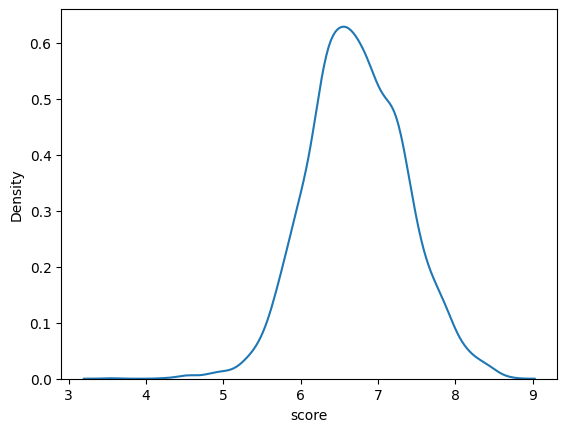

In [5]:
sns.kdeplot(data = df, x = 'score')

In [6]:
df['score'].describe()

count    4183.000000
mean        6.721896
std         0.625852
min         3.550000
25%         6.300000
50%         6.700000
75%         7.160000
max         8.670000
Name: score, dtype: float64

In [7]:
df_num = df[['popularity', 'budget', 'revenue', 'runtime', 'score']]

In [8]:
df_num.head(10)

,popularity,budget,revenue,runtime,score
0,359.169,3.374943e+07,1.085076e+08,108.0,7.62
1,106.478,8.000000e+06,4.413061e+08,122.0,7.65
2,91.974,1.850000e+08,1.004558e+09,152.0,8.49
3,145.651,1.650000e+08,6.751200e+08,169.0,8.40
4,75.106,1.100000e+07,7.753980e+08,121.0,8.17
5,68.278,1.400000e+08,5.851742e+08,126.0,7.62
6,150.089,1.250000e+08,9.764756e+08,152.0,7.90
7,110.360,6.000000e+06,2.450664e+08,175.0,8.66
8,84.382,1.600000e+08,8.255328e+08,148.0,8.34
9,97.801,2.370000e+08,2.787965e+09,162.0,7.56


In [9]:
def normalize(df, columns_to_normalize):
    df_normalized = df.copy()

    for column in columns_to_normalize:
        min_value = df[column].min()
        max_value = df[column].max()

        df_normalized[column] = (100 * (df[column] - min_value) / (max_value - min_value)).round(2)

    return df_normalized

In [10]:
columns_to_normalize = ['popularity', 'budget', 'revenue', 'runtime']

In [11]:
df_normalized = df_num.copy()
df_normalized = normalize(df_normalized, columns_to_normalize)

In [12]:
df_normalized.head(10)

,popularity,budget,revenue,runtime,score
0,100.00,8.88,3.89,42.62,7.62
1,29.53,2.11,15.83,48.36,7.65
2,25.48,48.68,36.03,60.66,8.49
3,40.45,43.42,24.22,67.62,8.40
4,20.78,2.89,27.81,47.95,8.17
5,18.87,36.84,20.99,50.00,7.62
6,41.69,32.89,35.02,60.66,7.90
7,30.61,1.58,8.79,70.08,8.66
8,23.37,42.11,29.61,59.02,8.34
9,27.11,62.37,100.00,64.75,7.56


In [13]:
#Function to create and add Labels in the data:

def add_labels(df):
    df['label'] = df['score'].apply(lambda score: 'Below Average' if score < 6.3 else ('Average' if 6.3 <= score <= 7.3 else 'Above Average'))
    return df

In [14]:
labeled_df = add_labels(df_normalized)

In [15]:
labeled_df.head(10)

,popularity,budget,revenue,runtime,score,label
0,100.00,8.88,3.89,42.62,7.62,Above Average
1,29.53,2.11,15.83,48.36,7.65,Above Average
2,25.48,48.68,36.03,60.66,8.49,Above Average
3,40.45,43.42,24.22,67.62,8.40,Above Average
4,20.78,2.89,27.81,47.95,8.17,Above Average
5,18.87,36.84,20.99,50.00,7.62,Above Average
6,41.69,32.89,35.02,60.66,7.90,Above Average
7,30.61,1.58,8.79,70.08,8.66,Above Average
8,23.37,42.11,29.61,59.02,8.34,Above Average
9,27.11,62.37,100.00,64.75,7.56,Above Average


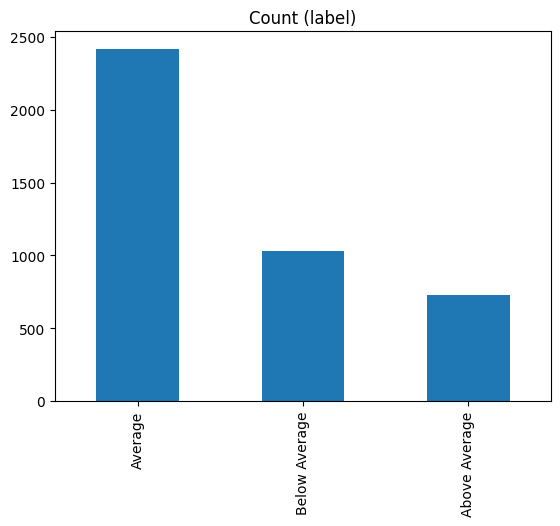

In [16]:
labeled_df.label.value_counts().plot(kind='bar', title='Count (label)');

In [17]:
sampled_df = labeled_df.sample(n=4127, random_state=42)

In [18]:
X = sampled_df.drop(['label', 'score'], axis = 1)
y = sampled_df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.head(10)

,popularity,budget,revenue,runtime
3209,6.56,10.53,3.89,37.30
441,7.53,0.26,0.52,36.89
2166,4.23,4.47,2.59,68.03
1309,4.29,15.79,4.66,34.84
3265,5.77,39.47,4.61,43.85
2909,7.27,8.88,1.58,41.39
867,7.09,11.05,0.87,48.36
1458,5.99,6.58,10.11,38.11
1562,7.28,8.88,3.89,48.77
1720,7.07,2.89,0.03,42.62


In [21]:
X_test.head(10)

,popularity,budget,revenue,runtime
3395,6.90,8.88,3.89,1.64
1140,5.86,0.66,0.52,38.52
2108,11.26,8.88,3.89,33.20
1629,4.45,8.88,1.77,36.48
4192,4.28,8.88,3.89,41.39
2439,3.72,8.88,3.89,46.31
3142,3.68,6.58,5.52,38.93
1830,6.39,1.58,0.37,38.11
1654,6.60,1.84,2.60,38.93
379,12.82,8.88,3.36,29.51


In [22]:
SVM_Model1=LinearSVC(C=50)
SVM_Model1.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model1.predict(X_test))
print("\nThe confusion matrix for Linear SVC C=50 is:")
print(SVM_matrix)


The confusion matrix for Linear SVC C=50 is:
[[  0 147   0]
 [  0 481   0]
 [  0 198   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



The accurary is: 0.5823244552058111



<Figure size 1800x1500 with 0 Axes>

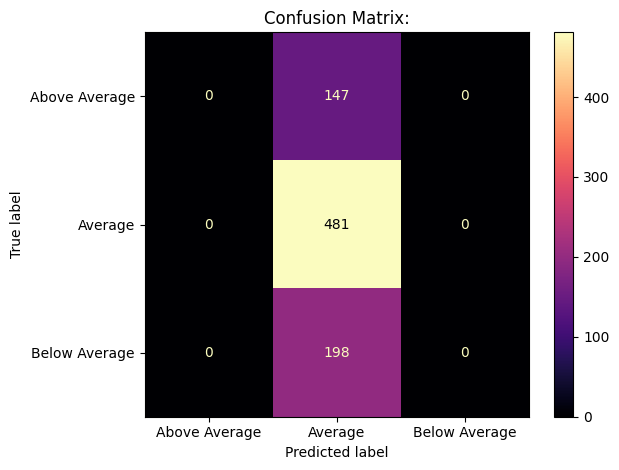

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred = SVM_Model1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model1.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [24]:
SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model1.predict(X_test))
print("\nThe confusion matrix for Linear SVC C=5 is:")
print(SVM_matrix)


The confusion matrix for Linear SVC C=5 is:
[[ 63  72  12]
 [ 59 390  32]
 [  4 170  24]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



The accurary is: 0.5774818401937046



<Figure size 1800x1500 with 0 Axes>

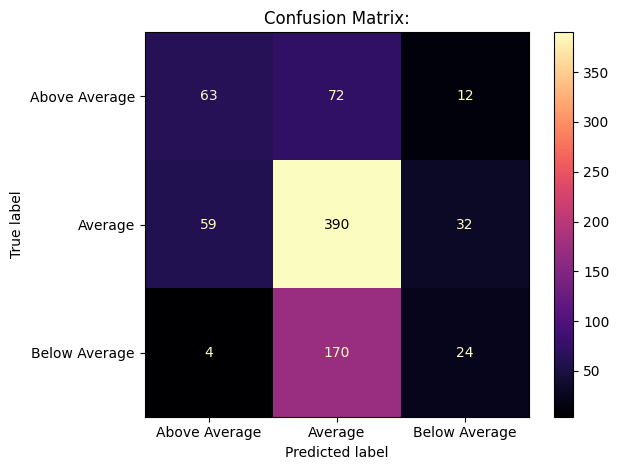

In [25]:
y_pred = SVM_Model1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model1.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.3s
[CV] END ..................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [29]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01)


In [30]:
SVM_matrix = confusion_matrix(y_test, grid.predict(X_test))
print("\nThe confusion matrix for SVM after GridSearchCV() is:")
print(SVM_matrix)


The confusion matrix for SVM after GridSearchCV() is:
[[ 45  99   3]
 [ 32 417  32]
 [  3 146  49]]



The accurary is: 0.6186440677966102



<Figure size 1800x1500 with 0 Axes>

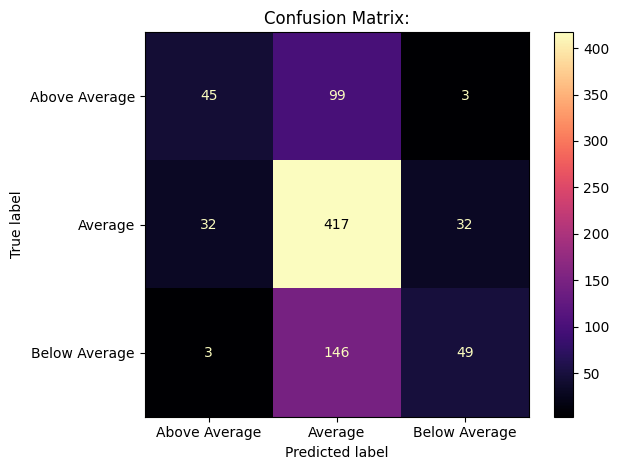

In [31]:
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=grid.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [32]:
## RBF
SVM_Model2=sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model2.predict(X_test))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)


The confusion matrix for rbf SVM is:
[[ 31 111   5]
 [ 15 427  39]
 [  3 137  58]]



The accurary is: 0.6246973365617433



<Figure size 1800x1500 with 0 Axes>

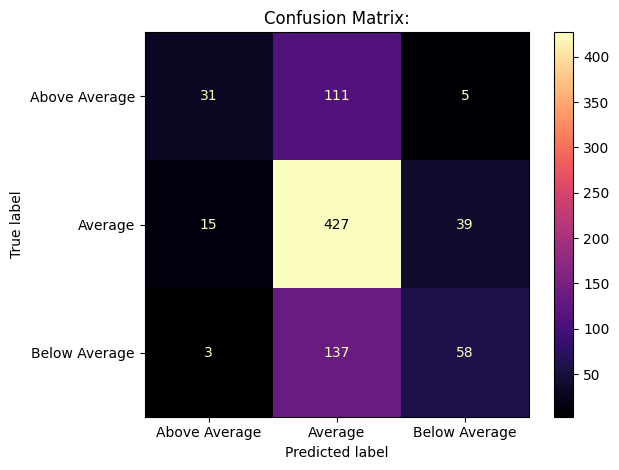

In [33]:
y_pred = SVM_Model2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model2.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
## POLY
SVM_Model3=sklearn.svm.SVC(C=1.0, kernel='poly', degree=2, gamma="auto")
SVM_Model3.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model3.predict(X_test))
print("\nThe confusion matrix for poly p = 2 SVM is:")
print(SVM_matrix)


The confusion matrix for poly p = 2 SVM is:
[[ 26 121   0]
 [ 15 459   7]
 [  1 188   9]]



The accurary is: 0.5980629539951574



<Figure size 1800x1500 with 0 Axes>

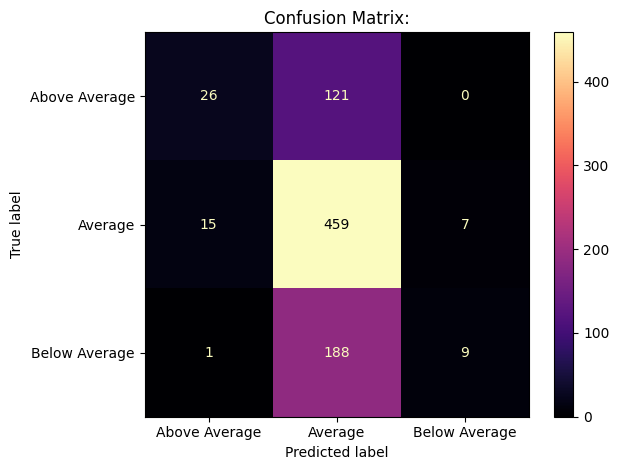

In [ ]:
y_pred = SVM_Model3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model3.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
## POLY
# SVM_Model4=sklearn.svm.SVC(C=1.0, kernel='poly', degree=3, gamma="auto")
# SVM_Model4.fit(X_train, y_train)

# #print("SVM prediction:\n", SVM_Model1.predict(TEST))
# #print("Actual:")
# #print(TEST_Labels)

# SVM_matrix = confusion_matrix(y_test, SVM_Model4.predict(X_test))
# print("\nThe confusion matrix for poly p = 3 SVM is:")
# print(SVM_matrix)

In [ ]:
# y_pred = SVM_Model4.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print(f"\nThe accurary is: {acc}\n")

# disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model4.classes_)
# plt.figure(figsize=(18, 15))
# disp.plot(cmap='magma')
# plt.title("Confusion Matrix:")
# plt.tight_layout()
# plt.show()

In [34]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
SVM_Model1=LinearSVC(C=10)
SVM_Model1.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model1.predict(X_test))
print("\nThe confusion matrix for Linear SVC is:")
print(SVM_matrix)


The confusion matrix for Linear SVC is:
[[370   3  98]
 [267   1 199]
 [204   0 288]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



The accurary is: 0.4608391608391608



<Figure size 1800x1500 with 0 Axes>

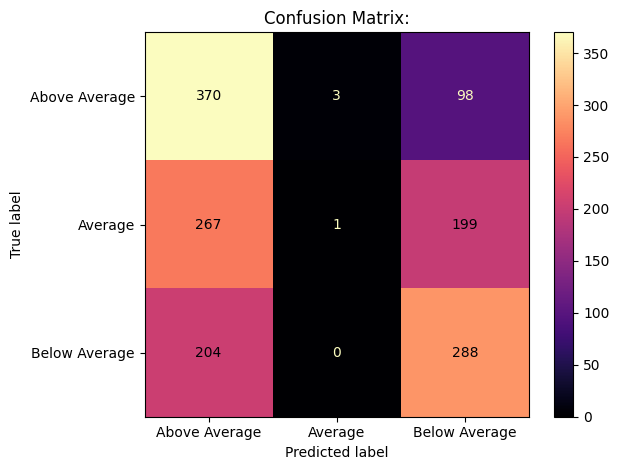

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred = SVM_Model1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model1.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [38]:
## RBF
SVM_Model2=sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model2.predict(X_test))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)


The confusion matrix for rbf SVM is:
[[383  67  21]
 [ 69 294 104]
 [ 24  75 393]]



The accurary is: 0.7482517482517482



<Figure size 1800x1500 with 0 Axes>

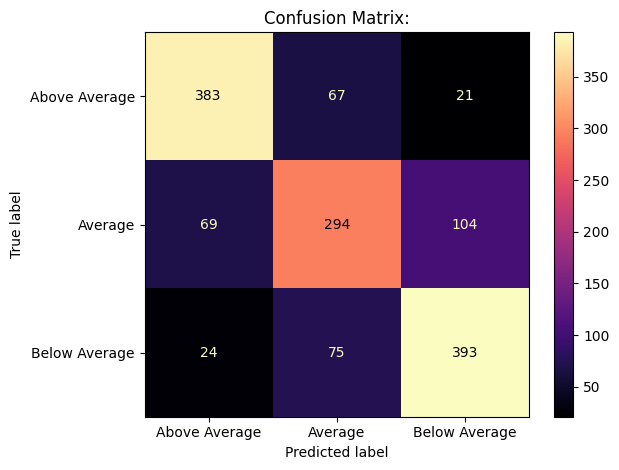

In [39]:
y_pred = SVM_Model2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model2.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [41]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.485 total time=   2.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   1.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.413 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.466 total time=   1.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.404 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.561 total time=   1.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.555 total time=   1.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.530 total time=   2.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.574 total time=   2.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.539 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.589 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [42]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)



The accurary is: 0.8615384615384616



<Figure size 1800x1500 with 0 Axes>

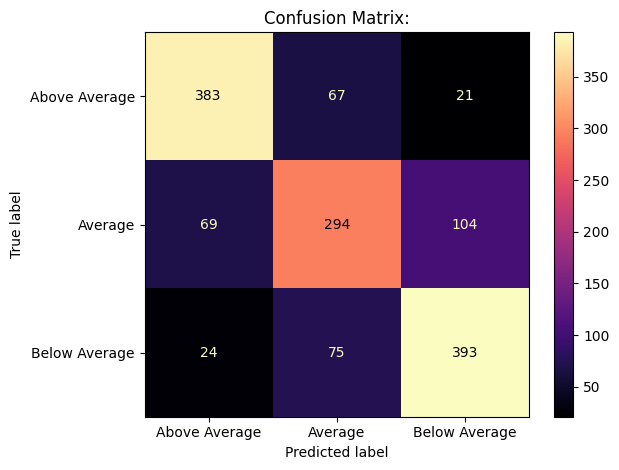

In [43]:
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=grid.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [44]:
## BEST RBF
SVM_Model2=sklearn.svm.SVC(C=10.0, kernel='rbf', degree=3, gamma=1)
SVM_Model2.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model2.predict(X_test))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)


The confusion matrix for rbf SVM is:
[[447  23   1]
 [ 25 381  61]
 [  5  83 404]]



The accurary is: 0.8615384615384616



<Figure size 1800x1500 with 0 Axes>

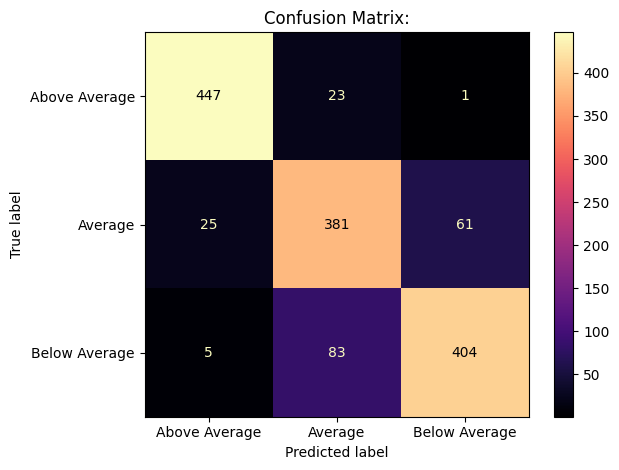

In [45]:
y_pred = SVM_Model2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model2.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
## POLY
SVM_Model3=sklearn.svm.SVC(C=1.0, kernel='poly', degree=2, gamma="auto")
SVM_Model3.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model3.predict(X_test))
print("\nThe confusion matrix for poly p = 2 SVM is:")
print(SVM_matrix)


The confusion matrix for poly p = 2 SVM is:
[[296  99  76]
 [100 202 165]
 [ 41 104 347]]



The accurary is: 0.5909090909090909



<Figure size 1800x1500 with 0 Axes>

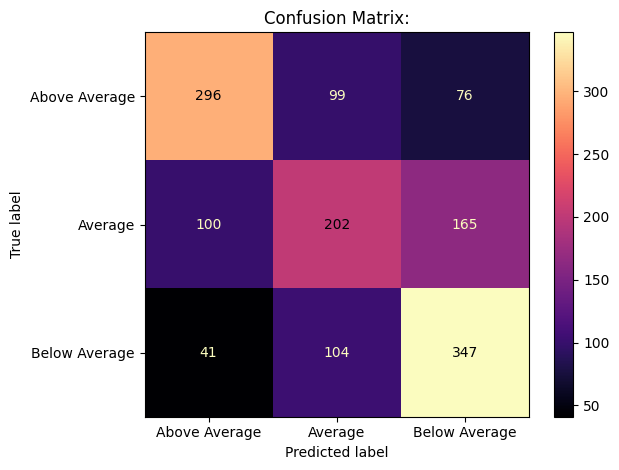

In [ ]:
y_pred = SVM_Model3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model3.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
SVM_Model1=LinearSVC(C=50)
SVM_Model1.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model1.predict(X_test))
print("\nThe confusion matrix for Linear SVC C=50 is:")
print(SVM_matrix)


The confusion matrix for Linear SVC C=50 is:
[[ 49 233 189]
 [ 27 263 177]
 [ 16 205 271]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



The accurary is: 0.4076923076923077



<Figure size 1800x1500 with 0 Axes>

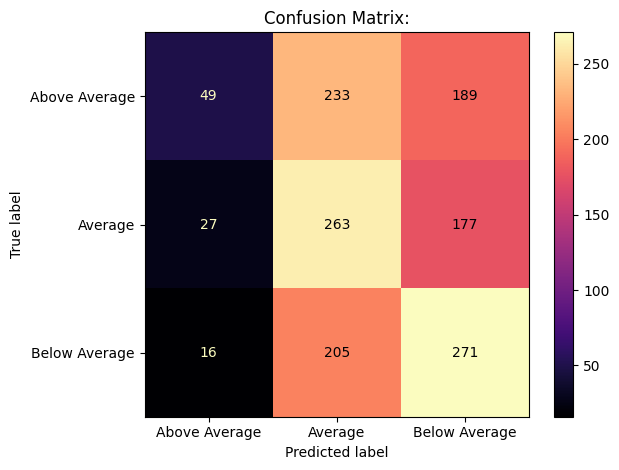

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred = SVM_Model1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model1.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
## RBF
SVM_Model2=sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model2.predict(X_test))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)


The confusion matrix for rbf SVM is:
[[376  79  16]
 [ 58 308 101]
 [ 19  81 392]]



The accurary is: 0.7524475524475525



<Figure size 1800x1500 with 0 Axes>

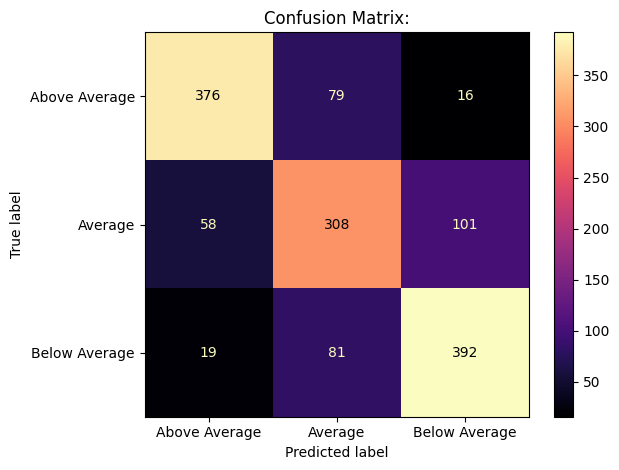

In [ ]:
y_pred = SVM_Model2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model2.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
## POLY
SVM_Model3=sklearn.svm.SVC(C=1.0, kernel='poly', degree=2, gamma="auto")
SVM_Model3.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model3.predict(X_test))
print("\nThe confusion matrix for poly p = 2 SVM is:")
print(SVM_matrix)


The confusion matrix for poly p = 2 SVM is:
[[296  99  76]
 [100 202 165]
 [ 41 104 347]]



The accurary is: 0.5909090909090909



<Figure size 1800x1500 with 0 Axes>

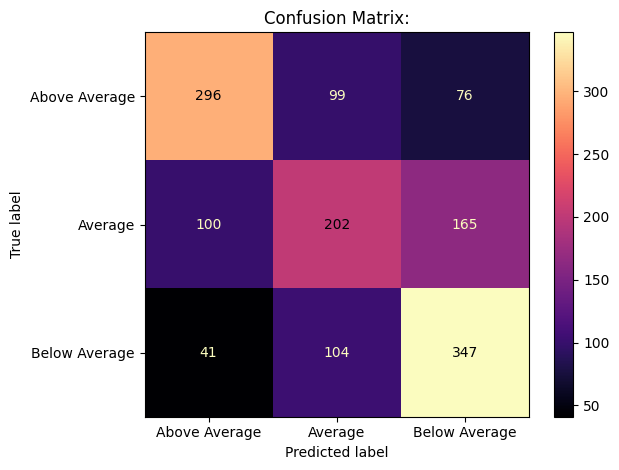

In [ ]:
y_pred = SVM_Model3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model3.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
sampled_df = labeled_df.sample(n=2500, random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [ ]:
X = sampled_df.drop(['label', 'score'], axis = 1)
y = sampled_df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
SVM_Model1=LinearSVC(C=50)
SVM_Model1.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model1.predict(X_test))
print("\nThe confusion matrix for Linear SVC C=50 is:")
print(SVM_matrix)


The confusion matrix for Linear SVC C=50 is:
[[ 31  14  51]
 [ 33  72 181]
 [  1  30  87]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



The accurary is: 0.38



<Figure size 1800x1500 with 0 Axes>

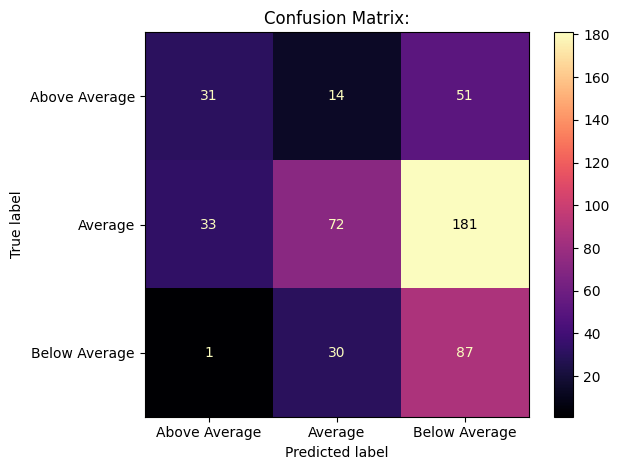

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred = SVM_Model1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model1.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
## RBF
SVM_Model2=sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model2.predict(X_test))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)


The confusion matrix for rbf SVM is:
[[ 14  80   2]
 [  5 265  16]
 [  2  93  23]]



The accurary is: 0.604



<Figure size 1800x1500 with 0 Axes>

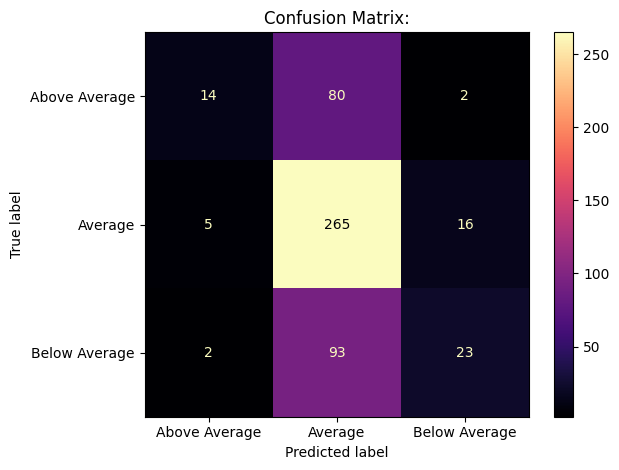

In [ ]:
y_pred = SVM_Model2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model2.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

In [ ]:
## POLY
SVM_Model3=sklearn.svm.SVC(C=1.0, kernel='poly', degree=2, gamma="auto")
SVM_Model3.fit(X_train, y_train)

#print("SVM prediction:\n", SVM_Model1.predict(TEST))
#print("Actual:")
#print(TEST_Labels)

SVM_matrix = confusion_matrix(y_test, SVM_Model3.predict(X_test))
print("\nThe confusion matrix for poly p = 2 SVM is:")
print(SVM_matrix)


The confusion matrix for poly p = 2 SVM is:
[[ 22  74   0]
 [  8 278   0]
 [  2 115   1]]



The accurary is: 0.602



<Figure size 1800x1500 with 0 Axes>

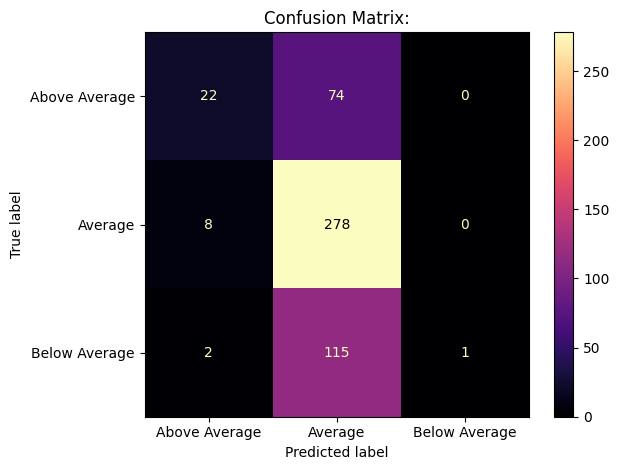

In [ ]:
y_pred = SVM_Model3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

disp = ConfusionMatrixDisplay(confusion_matrix=SVM_matrix, display_labels=SVM_Model3.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()